## Trabalho Final de Disciplica - Introdução a Processamento de Dados

#### Turma: Engenharia de Dados - Turma 02
#### Nome Completo: Evellen Thais Gomes Silva
#### Matrícula: 2518889



#### ---------------------------------------------------------------------------------------------------------------------------------------------

### Instruções:
##### O objetivo deste trabalho é processar os dados do Enem 2023, salvar os resultados em um banco de dados PostgreSQL, consultar esses dados utilizando Pandas (Python) e responder a um conjunto de perguntas analíticas.
#### Passos para Execução

1. Download dos Dados
Baixe o arquivo de microdados do Enem 2023 no link abaixo:

[Microdados Enem 2023 - INEP](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem)

Utilize o dicionário de dados disponível no site para entender o significado de cada coluna.

2. Processamento dos Dados
Realize o tratamento necessário nos dados, como:

Limpeza (remoção de valores ausentes ou inconsistentes)

Seleção de colunas relevantes

Conversão de tipos de dados, se necessário

Descreva brevemente os principais tratamentos realizados.

3. Armazenamento no Banco de Dados
Salve os dados tratados em um banco de dados PostgreSQL.

Documente:

O nome do banco de dados e das tabelas utilizadas

O método/ferramenta utilizada para realizar a carga (por exemplo: script Python, Pandas, PgAdmin, etc.)

4. Consulta e Análise com Pandas
Utilize a biblioteca Pandas (Python) para consultar os dados diretamente do banco de dados.

Responda às perguntas analíticas fornecidas utilizando funções do Pandas.

Apresente as respostas juntamente com o código utilizado para obtê-las.



## =====================================================

#### Import csv

In [17]:
# Bibliotecas
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt


In [2]:
data_df = pd.read_csv('MICRODADOS_ENEM_2023.csv', sep=';' , encoding='latin-1')

### Tratamento dos dados

In [3]:
columns = [
    'TP_PRESENCA_LC',
    'TP_SEXO',
    'TP_PRESENCA_MT',
    'TP_FAIXA_ETARIA',
    'TP_ESCOLA',
    'Q001',
    'Q002',
    'Q006',
    'NU_NOTA_REDACAO',
    'NU_NOTA_MT'
]

filtro_data = data_df.filter(columns)
del data_df 

In [4]:
filtro_data['NU_NOTA_MT'] = np.where(filtro_data['TP_PRESENCA_MT'] != 1, 0, filtro_data['NU_NOTA_MT'])
filtro_data['NU_NOTA_REDACAO'] = np.where(filtro_data['TP_PRESENCA_LC'] != 1, 0, filtro_data['NU_NOTA_REDACAO'])

In [5]:
qntd_estudantes = filtro_data['TP_PRESENCA_LC'].count()
qntd_ausencia = (filtro_data['TP_PRESENCA_LC'] == 0).sum()
taxa_ausencia_Linguagens_Codigos  = (qntd_ausencia * 100) / qntd_estudantes

qntd_estudantes = filtro_data['TP_PRESENCA_MT'].count()
qntd_ausencia = (filtro_data['TP_PRESENCA_MT'] == 0).sum()
taxa_ausencia_Matematica = (qntd_ausencia * 100) / qntd_estudantes

df_ausencias = pd.DataFrame({
                                'taxa_ausencia_Linguagens_Codigos':[taxa_ausencia_Linguagens_Codigos],
                                'taxa_ausencia_Matematica': [taxa_ausencia_Matematica]  
                             })


In [6]:

nomes_faixa_etaria = {
    1: 'Menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: "Entre 26 e 30 anos",
    12: "Entre 31 e 35 anos",
    13: "Entre 36 e 40 anos",
    14: "Entre 41 e 45 anos",
    15: "Entre 46 e 50 anos",
    16: "Entre 51 e 55 anos",
    17: "Entre 56 e 60 anos",
    18: "Entre 61 e 65 anos",
    19: "Entre 66 e 70 anos",
    20: "Maior de 70 anos"
}


df_faixa_etaria = filtro_data.groupby(by='TP_FAIXA_ETARIA').size().reset_index(name='quantidade')
total = df_faixa_etaria['quantidade'].sum()


df_faixa_etaria['percentual'] = df_faixa_etaria['quantidade'].map(lambda x: ((x * 100) / total).round(2))

df_faixa_etaria['faixa_etaria'] = df_faixa_etaria['TP_FAIXA_ETARIA'].map(nomes_faixa_etaria)

df_faixa_etaria = df_faixa_etaria.rename(columns={'TP_FAIXA_ETARIA': 'id'})


In [7]:
mulheres_presentes_na_prova_de_matemática = filtro_data[(filtro_data['TP_PRESENCA_MT'] == 1) & (filtro_data['TP_SEXO'] == 'F')]
média_dos_resultados_em_matemática_melheres = round(mulheres_presentes_na_prova_de_matemática['NU_NOTA_MT'].sum() / mulheres_presentes_na_prova_de_matemática['NU_NOTA_MT'].count(), 2)

homens_presentes_na_prova_de_matemática = filtro_data[(filtro_data['TP_PRESENCA_MT'] == 1) & (filtro_data['TP_SEXO'] == 'M')]
média_dos_resultados_em_matemática_homens = round(homens_presentes_na_prova_de_matemática['NU_NOTA_MT'].sum() / homens_presentes_na_prova_de_matemática['NU_NOTA_MT'].count(), 2)



homens_presentes_no_exame_liguagens = filtro_data[(filtro_data['TP_PRESENCA_LC'] == 1) & (filtro_data['TP_SEXO'] == 'M')]
media_homens_presentes_no_exame_liguagens = round(homens_presentes_no_exame_liguagens['NU_NOTA_REDACAO'].sum() / homens_presentes_no_exame_liguagens['NU_NOTA_REDACAO'].count(), 2)

mulheres_presentes_no_exame_liguagens = filtro_data[(filtro_data['TP_PRESENCA_LC'] == 1) & (filtro_data['TP_SEXO'] == 'F')]
media_mulheres_presentes_no_exame_liguagens = round(mulheres_presentes_no_exame_liguagens['NU_NOTA_REDACAO'].sum() / mulheres_presentes_no_exame_liguagens['NU_NOTA_REDACAO'].count(), 2)

df_dados_por_sexo = pd.DataFrame({
    'média_de_resultados_em_matemática_das_mulheres': [média_dos_resultados_em_matemática_melheres],
    'média_de_resultados_em_matemática_dos_homens': [média_dos_resultados_em_matemática_homens],
    'média_de_resultados_em_liguagens_das_mulheres': [media_mulheres_presentes_no_exame_liguagens],
    'média_de_resultados_em_liguagens_das_homens': [media_homens_presentes_no_exame_liguagens]
    
})


In [8]:
escolas_particulares_presentes_na_prova_de_matemática = filtro_data[(filtro_data['TP_PRESENCA_MT'] == 1) & (filtro_data['TP_ESCOLA'] == 3)]
média_dos_resultados_em_matemática_das_escolas_particulares = round(escolas_particulares_presentes_na_prova_de_matemática['NU_NOTA_MT'].sum() / escolas_particulares_presentes_na_prova_de_matemática['NU_NOTA_MT'].count(), 2)

escolas_publicas_presentes_na_prova_de_matemática = filtro_data[(filtro_data['TP_PRESENCA_MT'] == 1) & (filtro_data['TP_ESCOLA'] == 2)]
média_dos_resultados_em_matemática_das_escolas_publicas = round(escolas_publicas_presentes_na_prova_de_matemática['NU_NOTA_MT'].sum() / escolas_publicas_presentes_na_prova_de_matemática['NU_NOTA_MT'].count(), 2)

escolas_particulares_presentes_na_prova_de_linguagem = filtro_data[(filtro_data['TP_PRESENCA_LC'] == 1) & (filtro_data['TP_ESCOLA'] == 3)]
média_dos_resultados_em_linguagem_das_escolas_particulares = round(escolas_particulares_presentes_na_prova_de_linguagem['NU_NOTA_REDACAO'].sum() / escolas_particulares_presentes_na_prova_de_linguagem['NU_NOTA_REDACAO'].count(), 2)

escolas_publica_presentes_na_prova_de_linguagem = filtro_data[(filtro_data['TP_PRESENCA_LC'] == 1) & (filtro_data['TP_ESCOLA'] == 2)]
média_dos_resultados_em_linguagem_das_escolas_publica = round(escolas_publica_presentes_na_prova_de_linguagem['NU_NOTA_REDACAO'].sum() / escolas_publica_presentes_na_prova_de_linguagem['NU_NOTA_REDACAO'].count(), 2)

df_dados_por_tipo_de_escola = pd.DataFrame({
    'média_dos_resultados_em_matemática_das_escolas_particulares': [média_dos_resultados_em_matemática_das_escolas_particulares],
    'média_dos_resultados_em_matemática_das_escolas_publicas': [média_dos_resultados_em_matemática_das_escolas_publicas],
    'média_dos_resultados_em_linguagem_das_escolas_particulares': [média_dos_resultados_em_linguagem_das_escolas_particulares],
    'média_dos_resultados_em_linguagem_das_escolas_publica': [média_dos_resultados_em_linguagem_das_escolas_publica]
})

In [9]:
# Escolaridade do pai

nomes_dicionário = {
    'A': 'Nunca estudou',
    'B': 'Fundamental 1',
    'C': 'Fundamental 2',
    'D': 'Ensino Médio Incompleto',
    'E': 'Ensino Médio Completo',
    'F': 'Graduação completa',
    'G': 'Pós Graduação completa',
    'H': 'Não informado'
}

alunos_apresentam_matemática = filtro_data[filtro_data['TP_PRESENCA_MT'] == 1]

agrupados_por_educação_paterna = alunos_apresentam_matemática.groupby('Q001', as_index=False)[['NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().round(2)
agrupados_por_educação_paterna['label'] = agrupados_por_educação_paterna['Q001'].map(nomes_dicionário)
agrupados_por_educação_paterna = agrupados_por_educação_paterna.rename(columns={'Q001': 'id'})

# Escolaridade da mãe

nomes_dicionário = {
    'A': 'Nunca estudou',
    'B': 'Fundamental 1',
    'C': 'Fundamental 2',
    'D': 'Ensino Médio Incompleto',
    'E': 'Ensino Médio Completo',
    'F': 'Graduação completa',
    'G': 'Pós Graduação completa',
    'H': 'Não informado'
}

alunos_apresentam_matemática = filtro_data[filtro_data['TP_PRESENCA_MT'] == 1]

agrupados_por_educação_materna = alunos_apresentam_matemática.groupby('Q002', as_index=False)[['NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().round(2)
agrupados_por_educação_materna['label'] = agrupados_por_educação_materna['Q002'].map(nomes_dicionário)
agrupados_por_educação_materna = agrupados_por_educação_materna.rename(columns={'Q002': 'id'})



In [10]:
# Escolaridade dos pais

nomes_dicionário = {
    "A": "Nenhuma Renda",
    "B": "Até R$ 1.320,00",
    "C": "De R$ 1.320,01 até R$ 1.980,00",
    "D": "De R$ 1.980,01 até R$ 2.640,00",
    "E": "De R$ 2.640,01 até R$ 3.300,00",
    "F": "De R$ 3.300,01 até R$ 3.960,00",
    "G": "De R$ 3.960,01 até R$ 5.280,00",
    "H": "De R$ 5.280,01 até R$ 6.600,00",
    "I": "De R$ 6.600,01 até R$ 7.920,00",
    "J": "De R$ 7.920,01 até R$ 9.240,00",
    "K": "De R$ 9.240,01 até R$ 10.560,00",
    "L": "De R$ 10.560,01 até R$ 11.880,00",
    "M": "De R$ 11.880,01 até R$ 13.200,00",
    "N": "De R$ 13.200,01 até R$ 15.840,00",
    "O": "De R$ 15.840,01 até R$ 19.800,00",
    "P": "De R$ 19.800,01 até R$ 26.400,00",
    "Q": "Acima de R$ 26.400,00"
}

alunos_apresentam_matemática = filtro_data[filtro_data['TP_PRESENCA_MT'] == 1]

agrupados_por_renda = alunos_apresentam_matemática.groupby('Q006', as_index=False)[['NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().round(2)
agrupados_por_renda['label'] = agrupados_por_renda['Q006'].map(nomes_dicionário)
agrupados_por_renda = agrupados_por_renda.rename(columns={'Q006': 'id'})


### Insert no Banco de Dados

In [ ]:
import os
from sqlalchemy import create_engine


database_name = os.getenv('DATABASE_NAME')
database_user = os.getenv('DATABASE_USER')
database_password = os.getenv('DATABASE_PASSWORD')
database_port = os.getenv('DATABASE_PORT')
database_host = os.getenv('DATABASE_HOST')

engine = create_engine(f'postgresql://{database_user}:{database_password}@{database_host}:{database_port}/{database_name}')

In [ ]:
import psycopg2

DB_CONFIG = {
    'host': 'localhost',
    'database': 'processamentoDados',
    'user': 'postgres',
    'password': '1234',  
    'port': '5432'
}

try:
    conn = psycopg2.connect(
        host=DB_CONFIG['host'],
        database=DB_CONFIG['database'],
        user=DB_CONFIG['user'],
        password=DB_CONFIG['password'],
        port=DB_CONFIG['port']
    )
    print("Conexão com o PostgreSQL estabelecida com sucesso!")
    conn.close()
except Exception as e:
    print(f"Falha na conexão com o PostgreSQL: {e}")

✅ Conexão com o PostgreSQL estabelecida com sucesso!


In [ ]:
# Limpa todas as tabelas primeiro
with engine.begin() as conn:
    conn.execute("TRUNCATE TABLE abstence_calculated_data")
    conn.execute("TRUNCATE TABLE age_range_calculated_data")
    conn.execute("TRUNCATE TABLE sex_calculated_data")
    conn.execute("TRUNCATE TABLE school_type_calculated_data")
    conn.execute("TRUNCATE TABLE mother_education_calculated_data")
    conn.execute("TRUNCATE TABLE father_education_calculated_data")
    conn.execute("TRUNCATE TABLE income_calculated_data")

df_ausencias.to_sql('abstence_calculated_data', engine, if_exists='append')
df_faixa_etaria.to_sql('age_range_calculated_data', engine, if_exists='append')
df_dados_por_sexo.to_sql('sex_calculated_data', engine, if_exists='append')
df_dados_por_tipo_de_escola.to_sql('school_type_calculated_data', engine, if_exists='append')
agrupados_por_educação_materna.to_sql('mother_education_calculated_data', engine, if_exists='append')
agrupados_por_educação_paterna.to_sql('father_education_calculated_data', engine, if_exists='append')
agrupados_por_renda.to_sql('income_calculated_data', engine, if_exists='append')

engine.dispose()


In [ ]:
# Liberação de memória
del filtro_data
del df_ausencias
del df_dados_por_sexo
del agrupados_por_renda
del df_dados_por_tipo_de_escola
del agrupados_por_educação_materna
del agrupados_por_educação_paterna


### Recuperação dos dados usando Pandas

In [ ]:
consulta_para_receber_dados_calculados_de_ausência = 'select * from abstence_calculated_data'
ausência_de_dados = pd.read_sql(consulta_para_receber_dados_calculados_de_ausência, engine)


consulta_para_faixa_etária = 'select percentage, label, id from age_range_calculated_data'
intervalo_de_idade_dos_dados = pd.read_sql(consulta_para_faixa_etária, engine)

consulta_para_obter_sexo = 'select * from sex_calculated_data'
dados_sexo = pd.read_sql(consulta_para_obter_sexo, engine)

consulta__tipo_de_escola = 'select * from school_type_calculated_data'
dados_tipo_escola = pd.read_sql(consulta__tipo_de_escola, engine)

consulta_educação_materna = 'select * from mother_education_calculated_data'
dados_maternos_educação = pd.read_sql(consulta_educação_materna, engine)

consulta_educação_paterna = 'select * from father_education_calculated_data'
dados_paternos_educação = pd.read_sql(consulta_educação_paterna, engine)

consulta_renda = 'select * from income_calculated_data'
dadps_renda = pd.read_sql(consulta_renda, engine)

engine.dispose()


### Perguntas:

#### 1 - Qual o percentual de faltas dos cantidatos na disciplina de Matemática e Redação?

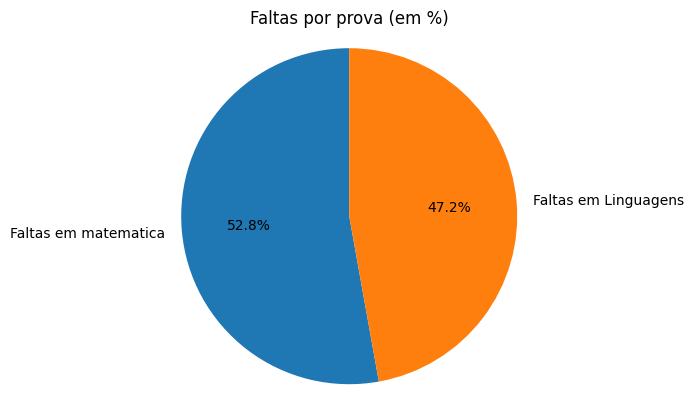

In [ ]:
df_ausencias
graphic = {
    'Faltas em matematica': df_ausencias['rate_math'][0],
    'Faltas em Linguagens': df_ausencias['rate_languages_​and_codes'][0],
}

plt.pie(graphic.values(), labels=graphic.keys(), autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Faltas por prova (em %)')
plt.show()

#### 2 - Se formos olhar para a distribuição das idades dos alunos, como estaria a distribuição dos alunos por faixas etárias?

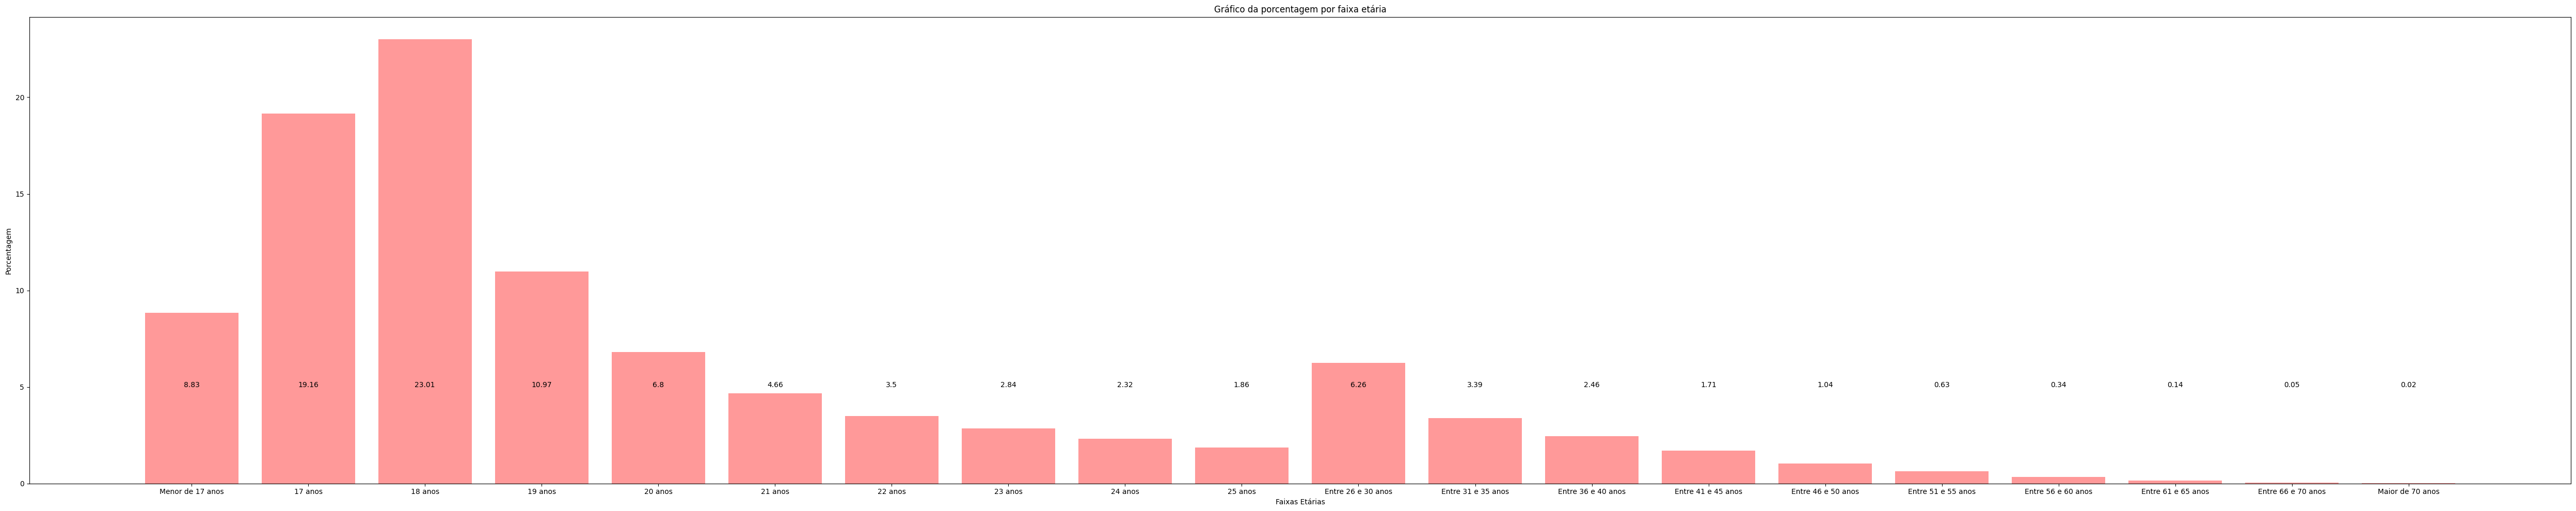

In [21]:
plt.figure(figsize=(50, 10))

for data in intervalo_de_idade_dos_dados.values:
    plt.bar(data[1], data[0], color='#FF9999')
    plt.text(data[2] - 1, 5, data[0], ha='center')


plt.xlabel('Faixas Etárias')
plt.ylabel('Porcentagem')
plt.title('Gráfico da porcentagem por faixa etária')
plt.tight_layout()
plt.show()
plt.close()



### 3 - Quem tem as melhores notas em matemática e redação, candidatos do sexo masculino ou feminino?

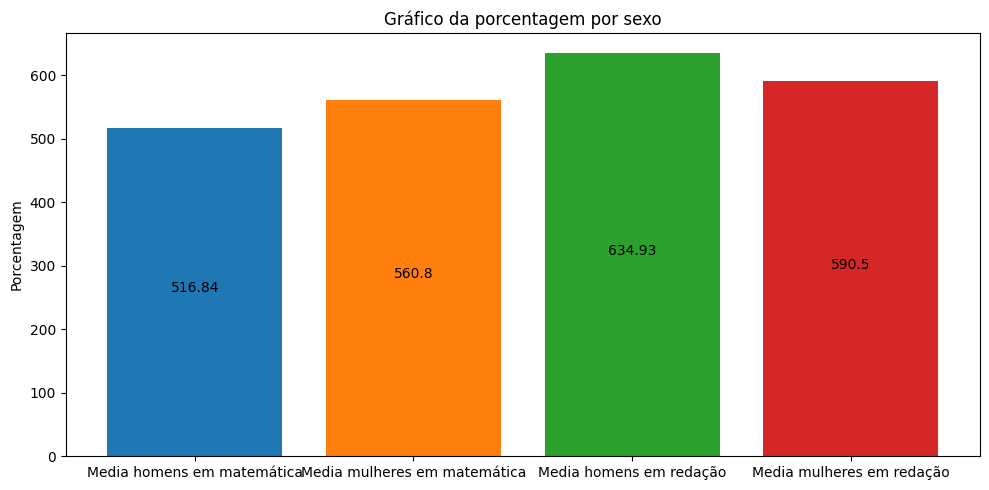

In [22]:
# Para resposta dessa questão foi considerada a média das notas dos alunos presentes (excluindo faltas)


data = dados_sexo.values[0]

# data_age_range['females_mean_of_results_in_math']

graphic = {
    'Media homens em matemática': data[1],
    'Media mulheres em matemática': data[2],
    'Media homens em redação': data[3],
    'Media mulheres em redação': data[4]
}

plt.figure(figsize=(10, 5))
counter = 0

for key, value in graphic.items():
    plt.bar(key, value)
    plt.text(counter, value / 2, value, ha='center')
    counter += 1

plt.ylabel('Porcentagem')
plt.title('Gráfico da porcentagem por sexo')
plt.tight_layout()
plt.show()
plt.close()


### 4 - Há alguma influência no tipo da escola (publica e privada) nas notas de matemática e redação?

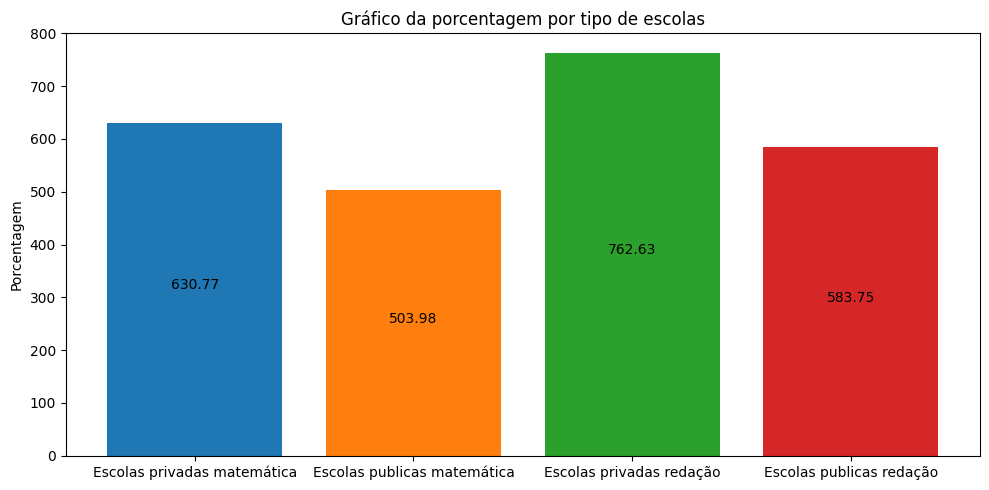

In [ ]:
# Para resposta dessa questão foi considerada a média das notas dos alunos presentes (excluindo faltas)
data = df_dados_por_tipo_de_escola.values[0]

graphic = {
    'Escolas privadas matemática': data[1],
    'Escolas publicas matemática': data[2],
    'Escolas privadas redação': data[3],
    'Escolas publicas redação': data[4]
}

plt.figure(figsize=(10, 5))
counter = 0

for key, value in graphic.items():
    plt.bar(key, value)
    plt.text(counter, value / 2, value, ha='center')
    counter += 1

plt.ylabel('Porcentagem')
plt.title('Gráfico da porcentagem por tipo de escolas')
plt.tight_layout()
plt.show()
plt.close()

### 5 - Qual a influência da escolaridade do Pai nas notas de Matemática e Redação? 

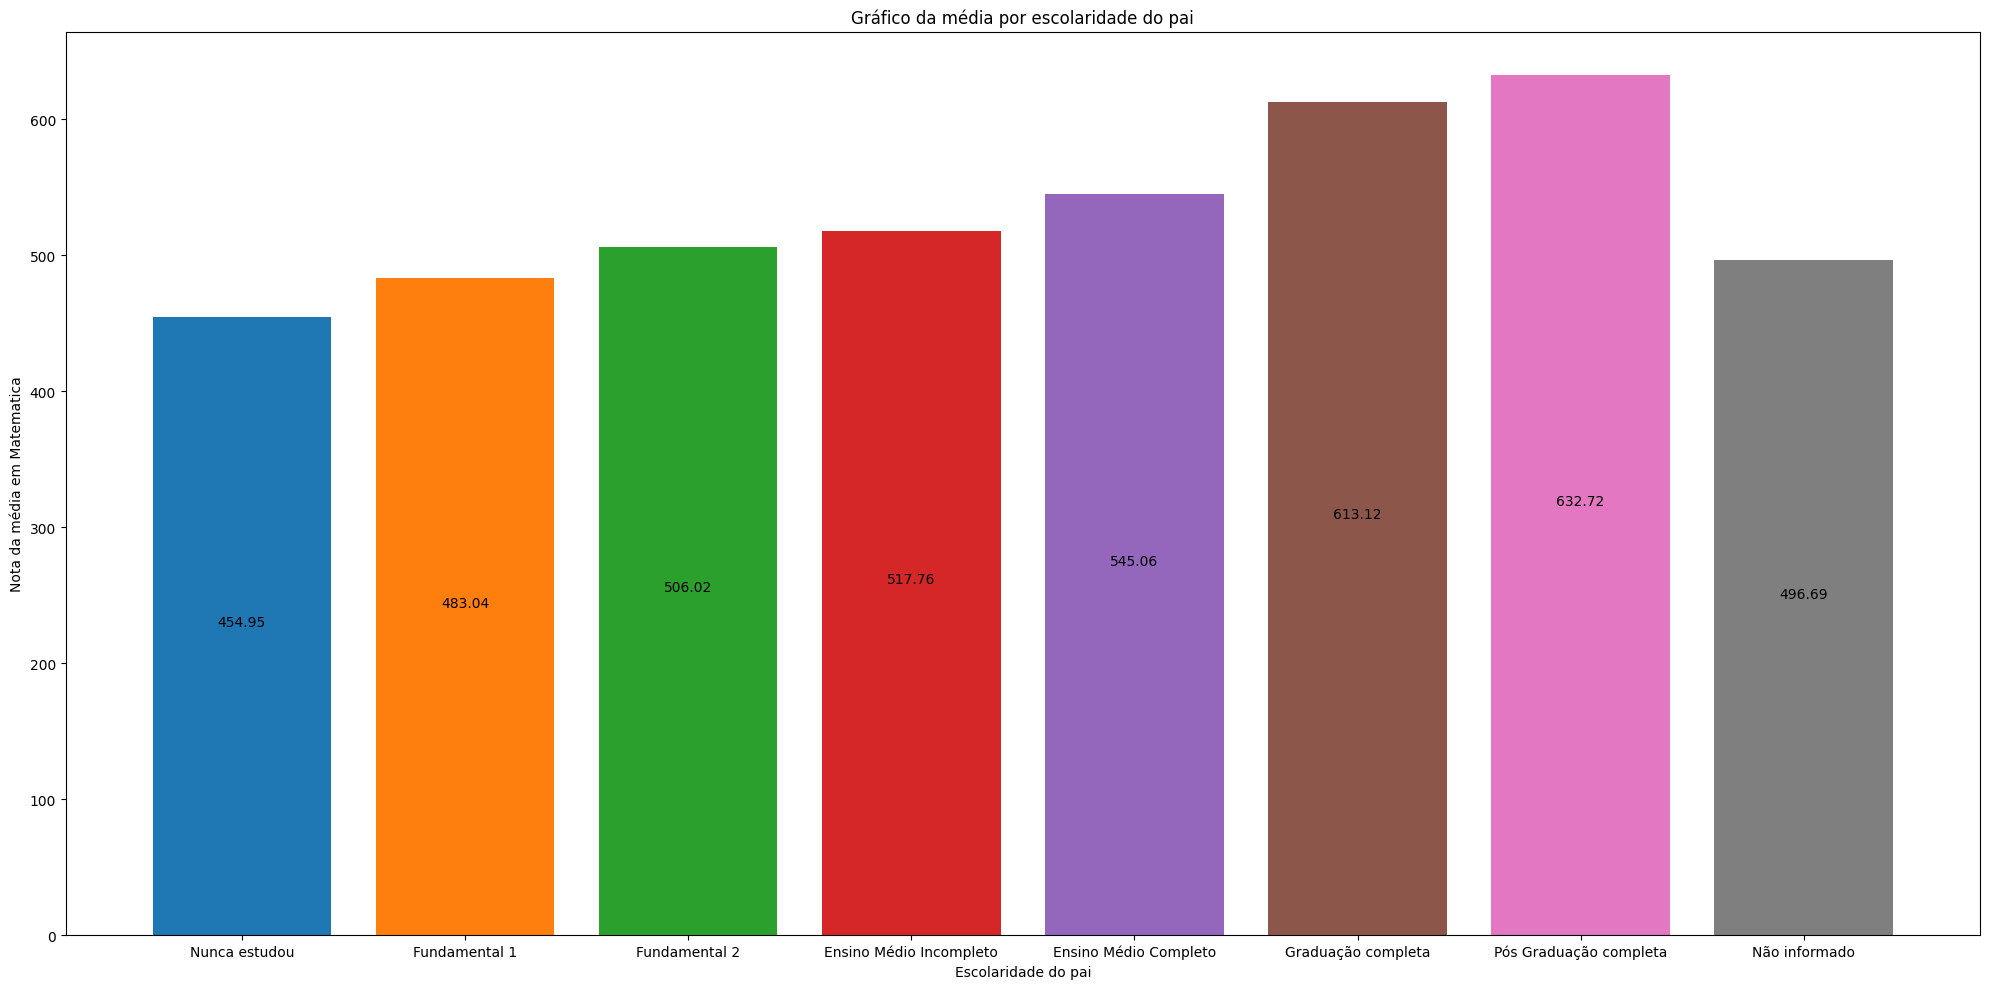

In [24]:
plt.figure(figsize=(20, 10))

for data in dados_paternos_educação.values:
    plt.bar(data[4], data[2])
    plt.text(data[0], data[2] / 2, data[2], ha='center')


plt.xlabel('Escolaridade do pai')
plt.ylabel('Nota da média em Matematica')
plt.title('Gráfico da média por escolaridade do pai')
plt.tight_layout()
plt.show()
plt.close()


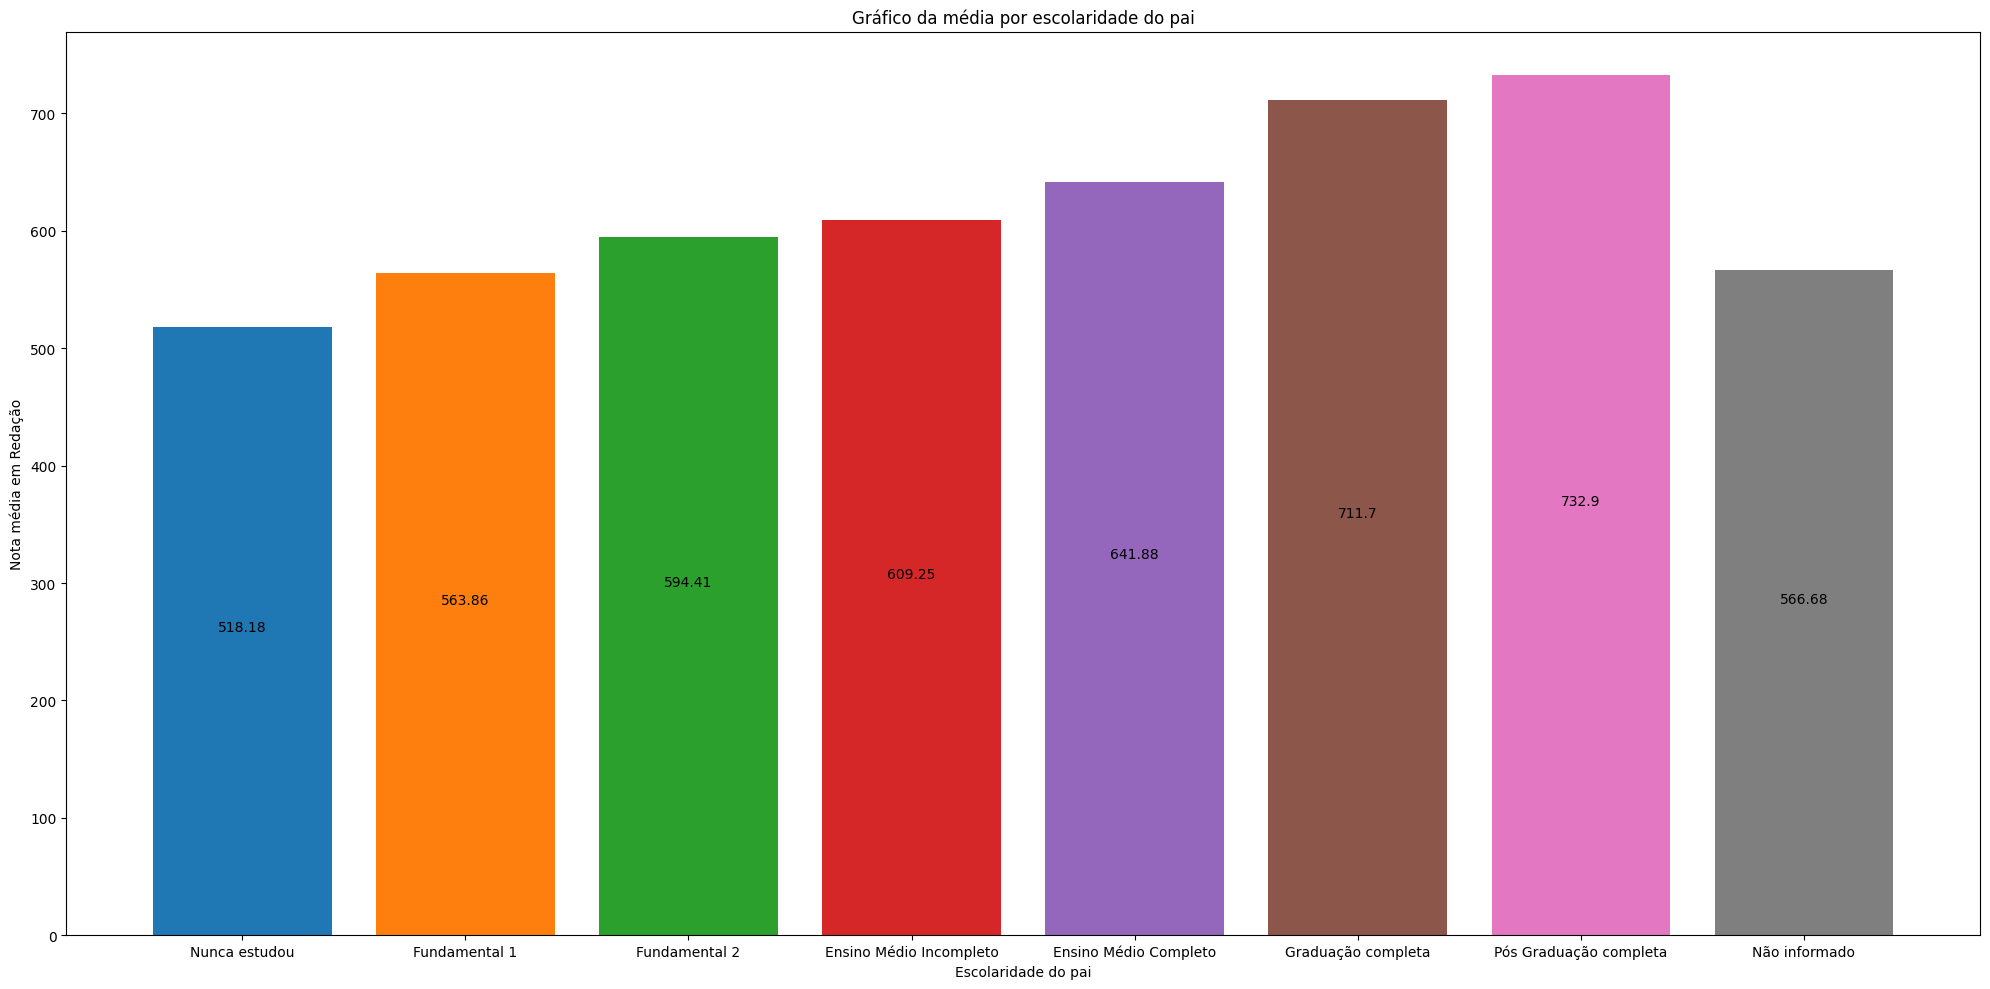

In [25]:
plt.figure(figsize=(20, 10))

for data in dados_paternos_educação.values:
    plt.bar(data[4], data[3])
    plt.text(data[0], data[3] / 2, data[3], ha='center')


plt.xlabel('Escolaridade do pai')
plt.ylabel('Nota média em Redação')
plt.title('Gráfico da média por escolaridade do pai')
plt.tight_layout()
plt.show()
plt.close()


### 6 - Qual a influência da escolaridade do Mãe nas notas de Matemática e Redação? 

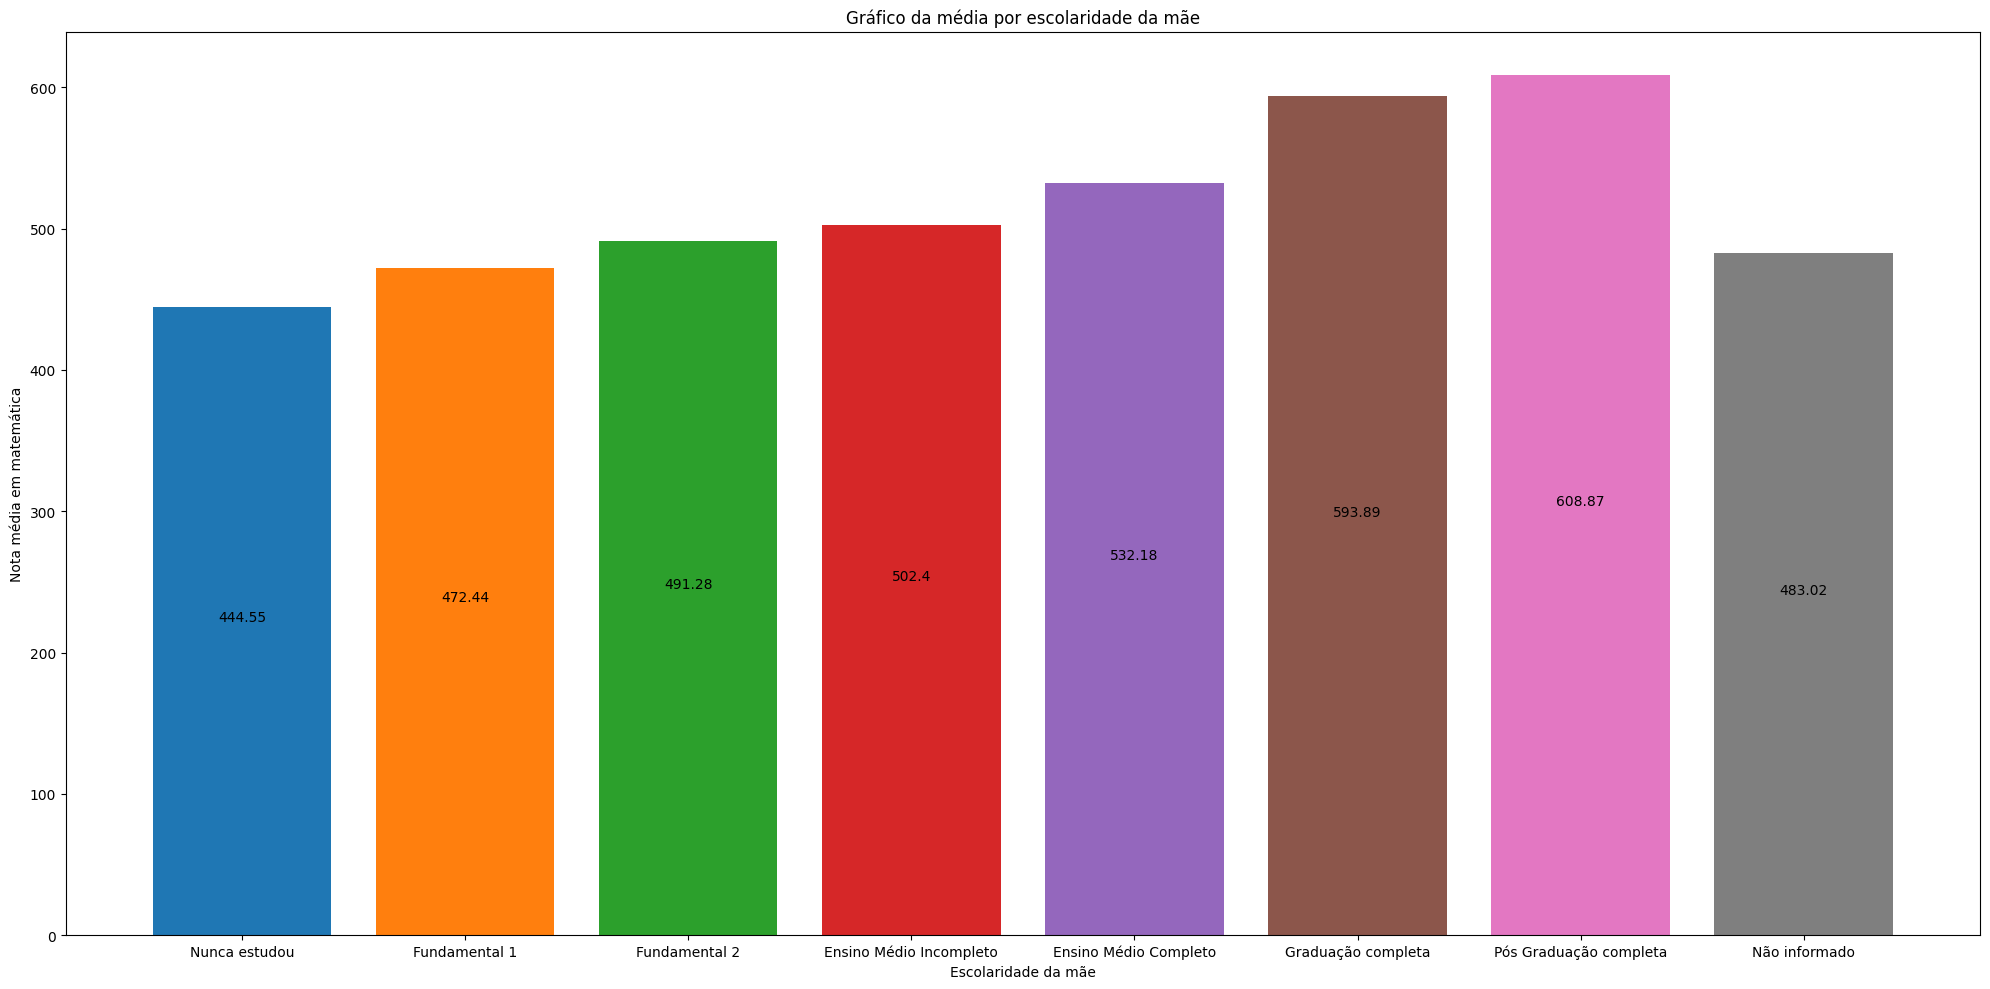

In [26]:
plt.figure(figsize=(20, 10))

for data in dados_maternos_educação.values:
    plt.bar(data[4], data[2])
    plt.text(data[0], data[2] / 2, data[2], ha='center')


plt.xlabel('Escolaridade da mãe')
plt.ylabel('Nota média em matemática')
plt.title('Gráfico da média por escolaridade da mãe')
plt.tight_layout()
plt.show()
plt.close()


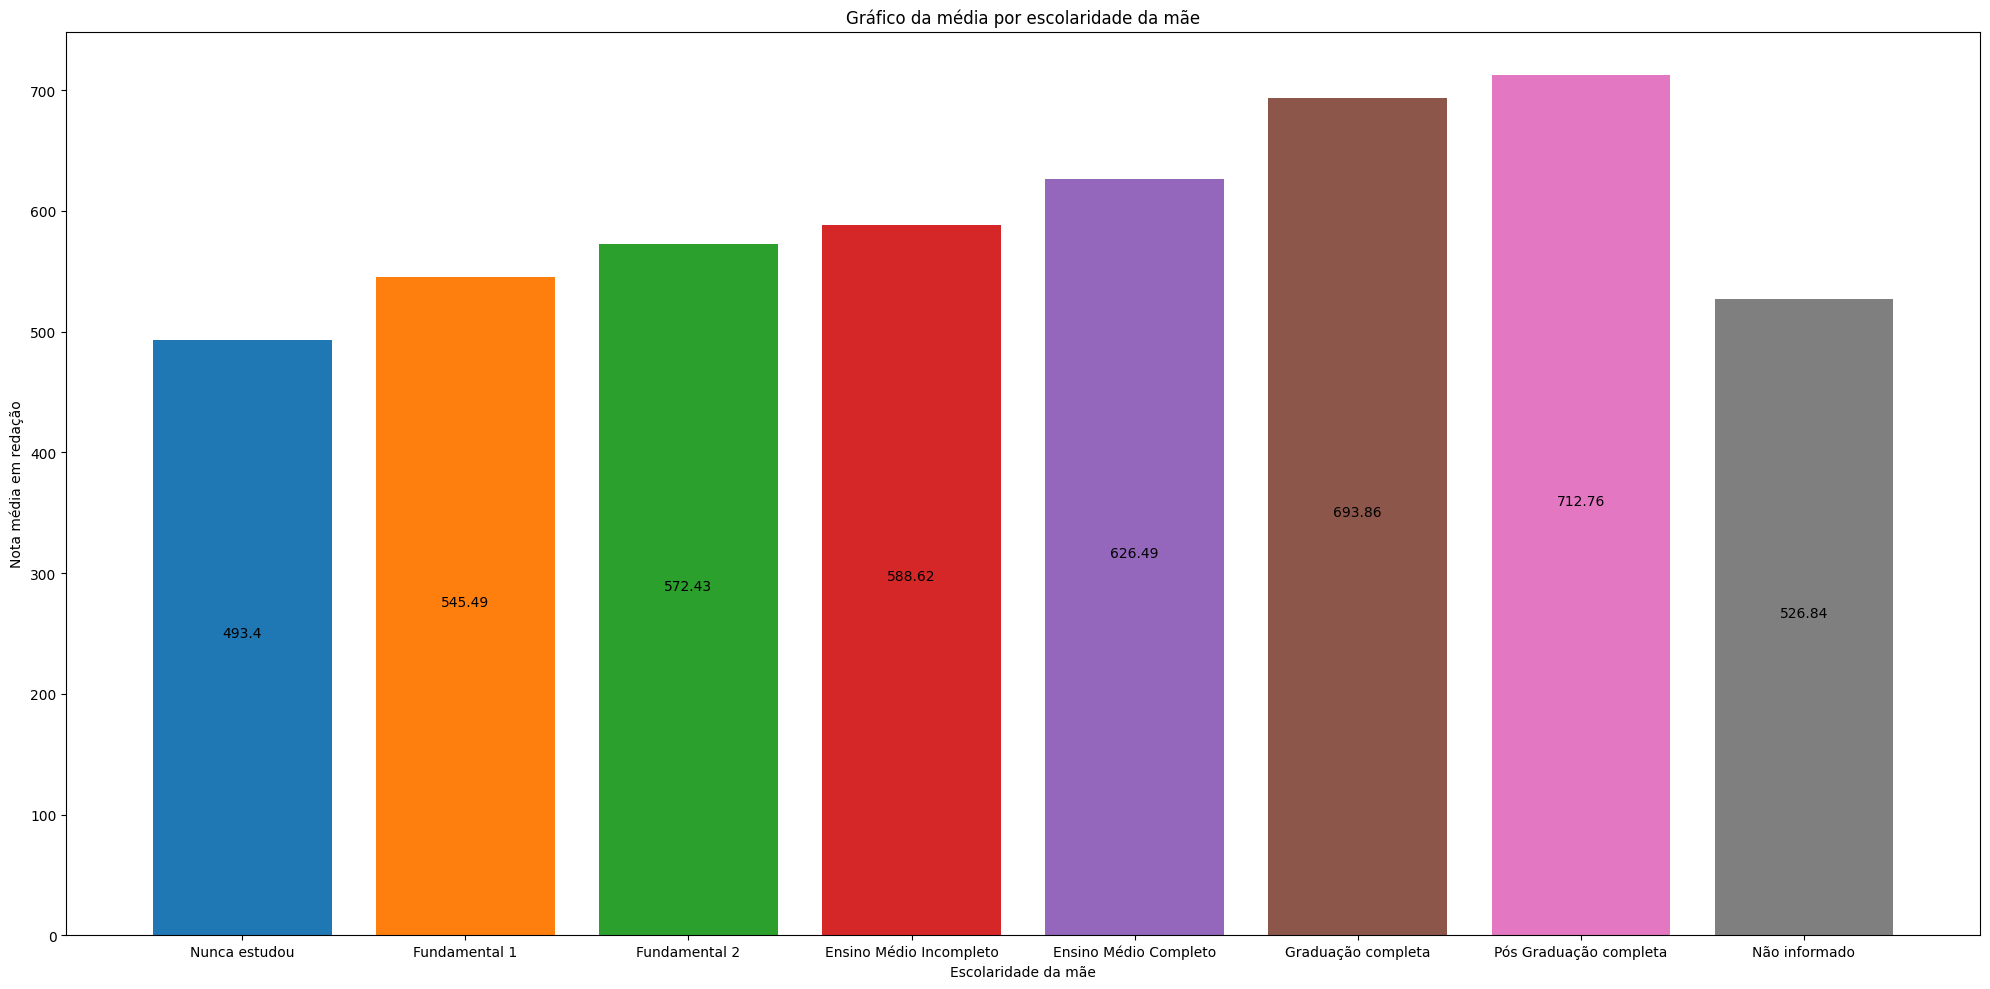

In [27]:
plt.figure(figsize=(20, 10))

for data in dados_maternos_educação.values:
    plt.bar(data[4], data[3])
    plt.text(data[0], data[3] / 2, data[3], ha='center')


plt.xlabel('Escolaridade da mãe')
plt.ylabel('Nota média em redação')
plt.title('Gráfico da média por escolaridade da mãe')
plt.tight_layout()
plt.show()
plt.close()


### 5 - Qual a influência da renda do Pai e da Mãe nas notas de Matemática e Redação? 

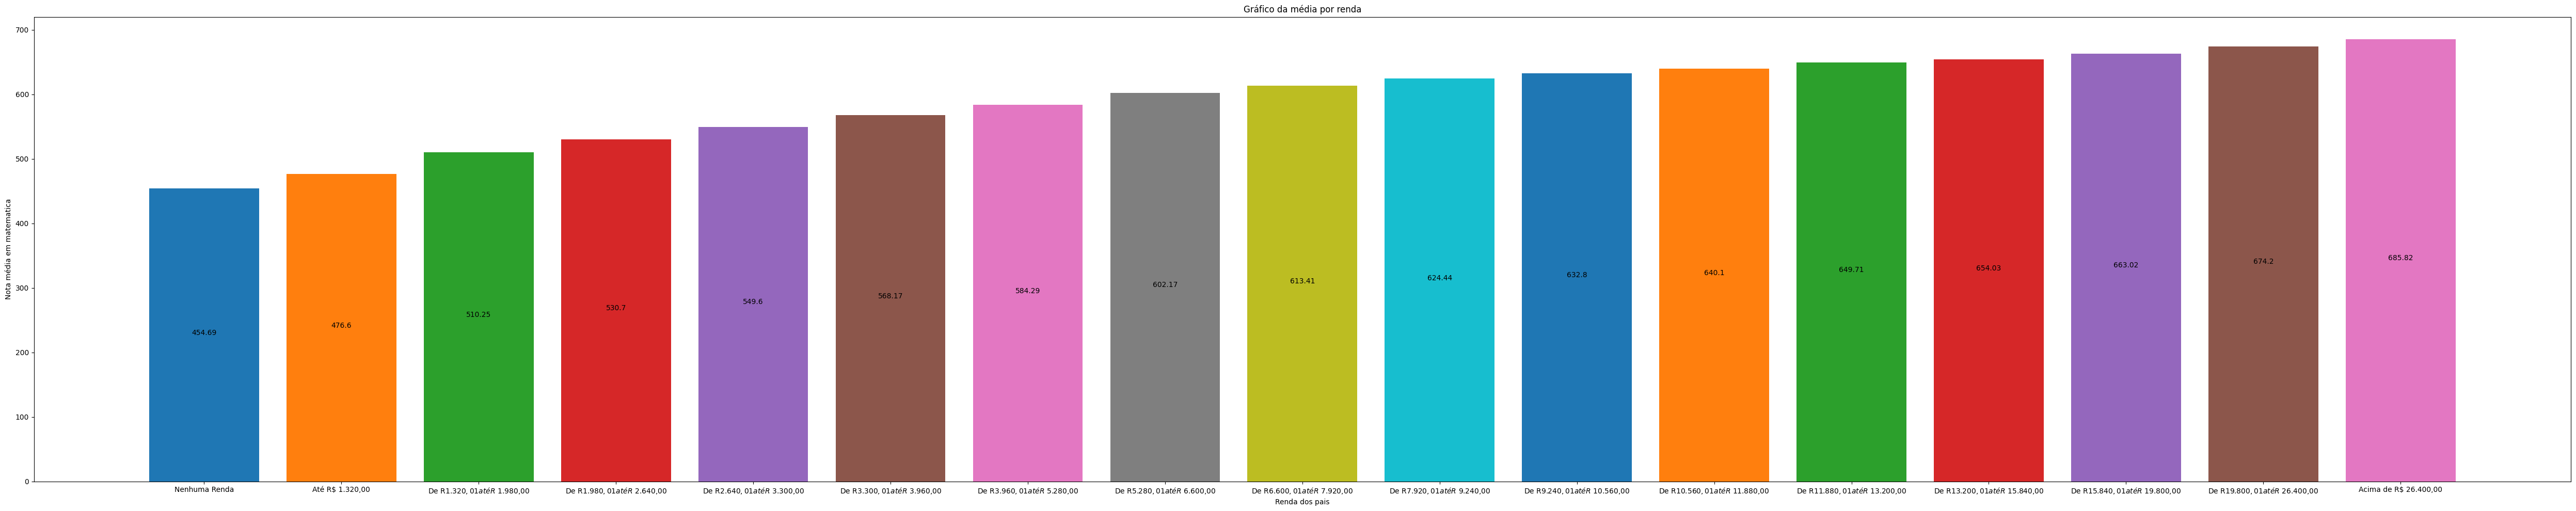

In [ ]:
plt.figure(figsize=(50, 10))

for data in agrupados_por_renda.values:
    plt.bar(data[4], data[2])
    plt.text(data[0], data[2] / 2, data[2], ha='center')


plt.xlabel('Renda dos pais')
plt.ylabel('Nota média em matematica')
plt.title('Gráfico da média por renda')
plt.tight_layout()
plt.show()
plt.close()

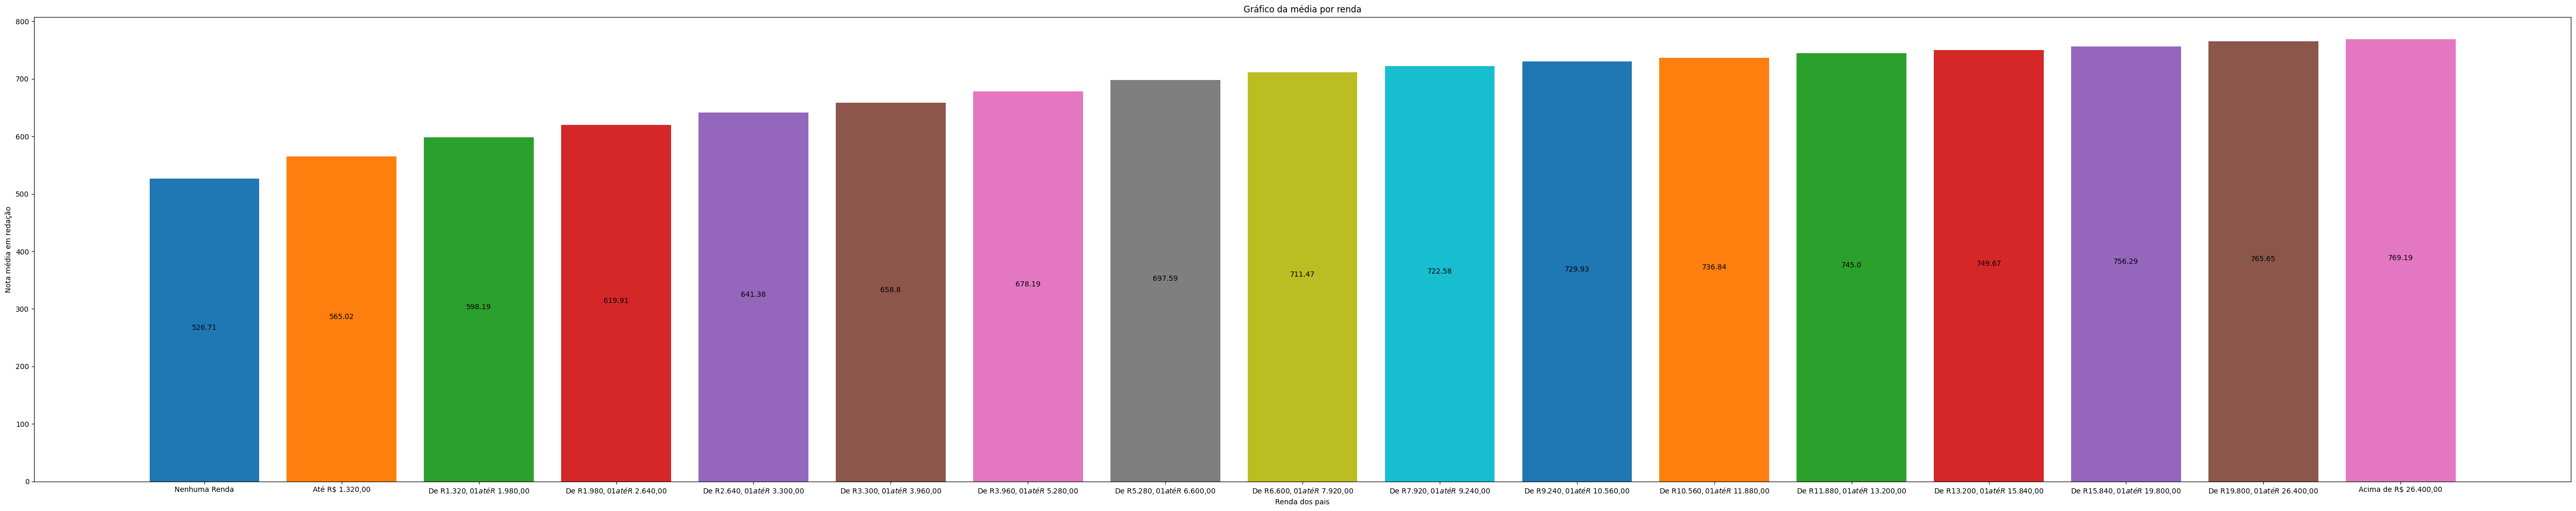

In [ ]:
plt.figure(figsize=(50, 10))

for data in agrupados_por_renda.values:
    plt.bar(data[4], data[3])
    plt.text(data[0], data[3] / 2, data[3], ha='center')


plt.xlabel('Renda dos pais')
plt.ylabel('Nota média em redação')
plt.title('Gráfico da média por renda')
plt.tight_layout()
plt.show()
plt.close()